In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:16])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      1   1   2  84  27   2   0   1   0   0   0
1      1   1   2  54  25   9   0   0   0   0   0
2      1   1   2  41  41   2   1   0   0   0   0
3      3   3   2  64  34   9   0   0   0   0   0
4      3   1   2  22  13   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2482   1   1   1  50  25   9   0   0   0   0   0
2483   1   2   1  58  49   8   0   0   0   0   0
2484   1   2   1   3  36   9   0   0   0   0   0
2485   3   2   2  48  40   9   0   0   0   0   0
2486   1   1   1  81  37   7   0   0   0   0   0

[2487 rows x 11 columns]
      0
0     0
1     0
2     1
3     1
4     1
...  ..
2482  1
2483  0
2484  1
2485  0
2486  1

[2487 rows x 1 columns]
Counter({0: 1})
(2778, 11)
(2778, 1)
Index(['Location of Incident', 'Time', 'Gender', 'Age', 'State',
       'Injury Agent ', 'Confined Space', 'Grain Involved', 'Alcohol/Drugs',
       'Seatbelt', 'Helmet', 'Fatal'],
      dtype='object')


In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import CategoricalNB 
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [3]:

pbounds = {
    'alpha':(0,100)}

def categorialnb_hyper_param(alpha
                        ):
    clf = CategoricalNB(
        alpha = alpha)
    return np.mean(cross_val_score(clf, X_train, Y_train, cv=10, scoring='roc_auc'))

optimizer = BayesianOptimization(
    f=categorialnb_hyper_param,
    pbounds=pbounds,
    random_state=1,
)
optimizer.maximize(init_points=1, n_iter=1)
best_params = optimizer.max['params']

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.5759    | 41.7      |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

| 2         | 0.5702    | 75.4      |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

In [4]:
model = CategoricalNB(alpha = best_params['alpha'])
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=41.7022004702574)

In [5]:
print(best_params['alpha'])

41.7022004702574


In [6]:
res = model.predict(X_test)
print(res)
print(Y_test)

[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.6345381526104418
              precision    recall  f1-score   support

           0   0.446009  0.597484  0.510753       159
           1   0.775439  0.651917  0.708333       339

    accuracy                       0.634538       498
   macro avg   0.610724  0.624701  0.609543       498
weighted avg   0.670259  0.634538  0.645250       498



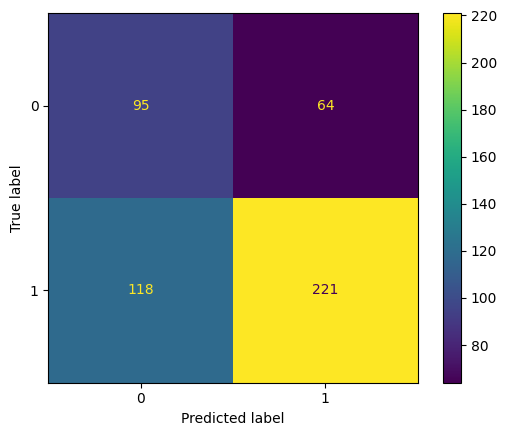

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


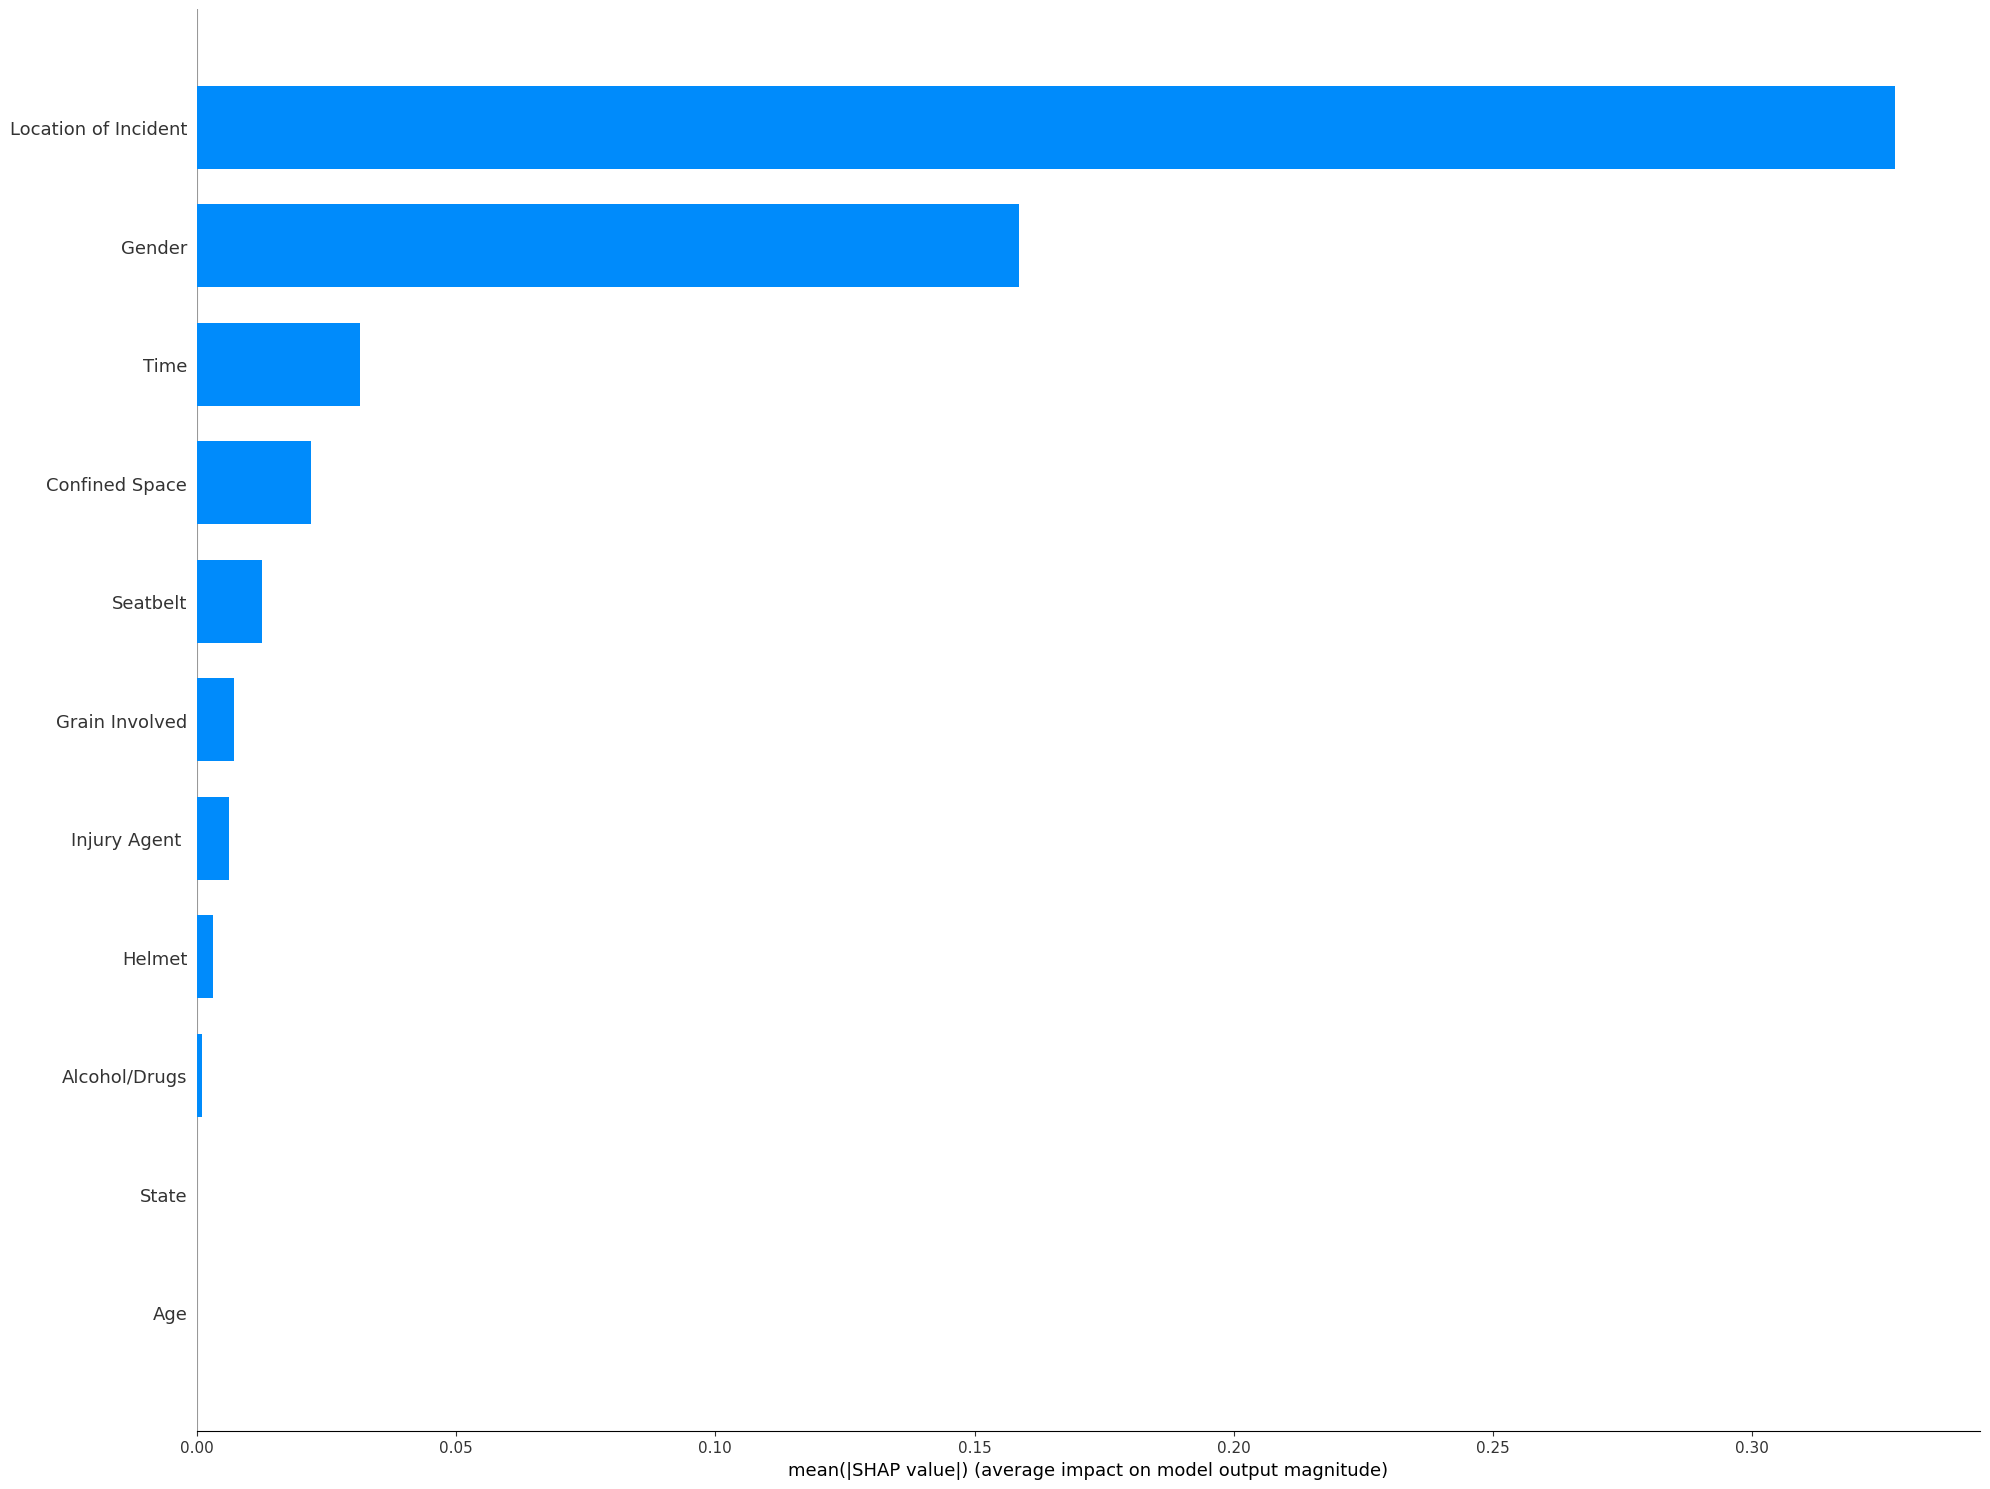

In [9]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

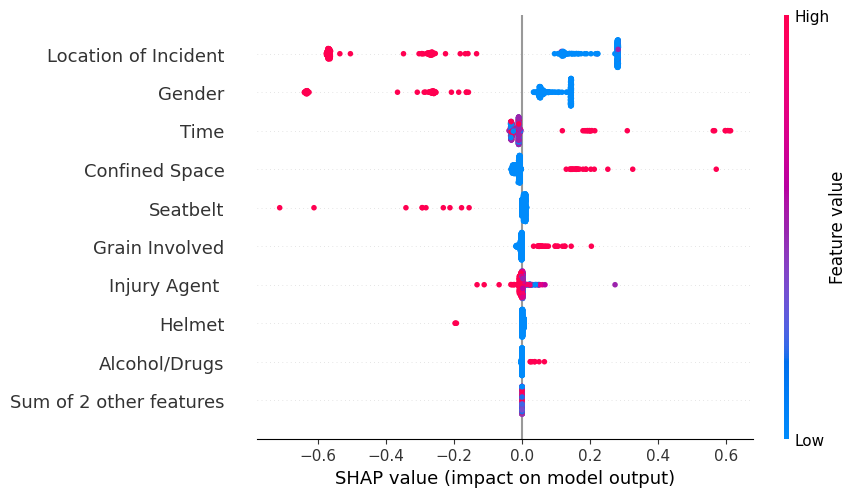

In [10]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)